In [9]:
using JLD2
using FileIO
using Plots
using LinearAlgebra
using LaTeXStrings
using Meshfree4ScalarEq.ScalarHyperbolicEquations
using Meshfree4ScalarEq.ParticleGrids
using Meshfree4ScalarEq.TimeIntegration
using Meshfree4ScalarEq.Interpolations
using Meshfree4ScalarEq.SimSettings
using Meshfree4ScalarEq

In [10]:
Algorithms = ["muscl2RusanovFlux"; "muscl2RusanovFluxMOOD"];
AlgNames = ["MUSCL 2 w. Rusanov Flux"; "MUSCL 2 w. Rusanov Flux + MOOD"];
linestyles = [:dashdot; :solid];
colors = [:red; :blue];

In [11]:
folder = "$(@__DIR__)/data/"
grids = [];
algIndices = [];
tfinal = 0

for file in readdir(folder)
    if isdir(folder*file)
        Alg, init, N = split(file, "_")
        N = parse(Float64, N)
        if init == "shockInit"
            algIndex = findfirst(x -> x == Alg, Algorithms)
            push!(grids, load(folder*file*"/data/step1.jld2")["particleGrid"])
            push!(algIndices, algIndex)
            tfinal = load(folder*file*"/data/settings.jld2")["settings"].tmax
        end
    end
end

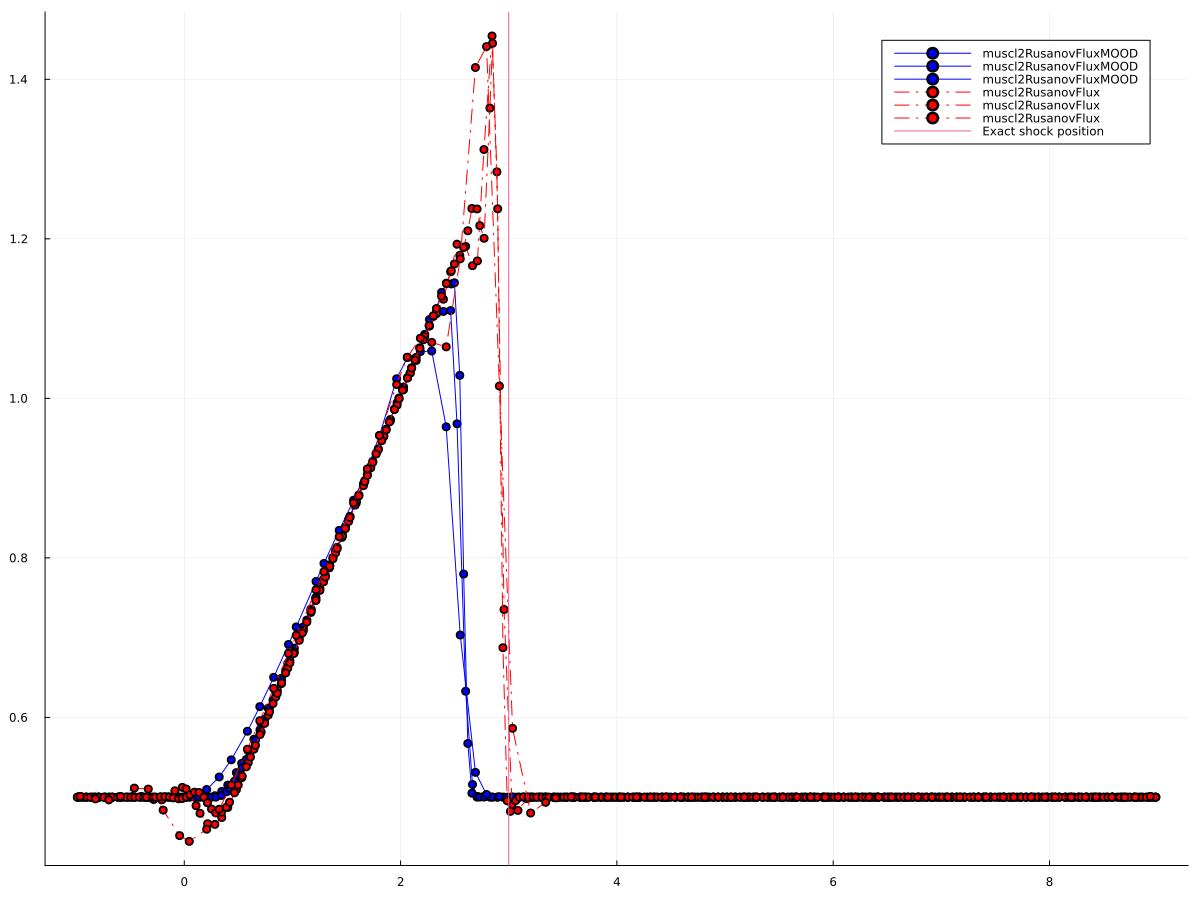

In [12]:
p1 = plot(size=(1200, 900))
for (index, grid) in enumerate(grids)
    algIndex = algIndices[index]
    pos = map(particle -> particle.pos, grid.grid)
    rhos = map(particle -> particle.rho, grid.grid)
    plot!(p1, pos, rhos, label=Algorithms[algIndex], ls=linestyles[algIndex], c=colors[algIndex], markershape=:circle)
end
plot!(p1, [tfinal], seriestype="vline", label="Exact shock position")
display(p1)